In [202]:
# Regression Model Comparison in Machine Learning

This Jupyter notebook provides a comprehensive comparison of various regression models for tabular datasets. The notebook aims to provide users with hands-on experience in applied machine learning by covering various aspects of machine learning, including data collection, data preparation, model training, hyperparameter search, performance evaluation, and interpretation of trained models.

The notebook evaluates the performance of eight different regression models provided by scikit-learn, including Linear Regression, Support Vector Regression, Decision Tree Regression, Random Forest Regression, k-nearest neighbors Regression, AdaBoost Regression, Gaussian Process Regression, and Neural Network Regression. The performance of each model is evaluated on eight different regression datasets sourced from the UCI repository, including Wine Quality, Communities and Crime, QSAR aquatic toxicity, Facebook metrics, Bike Sharing, Student Performance, Concrete Compressive Strength, and SGEMM GPU kernel performance.

In addition to model performance evaluation, the notebook provides comprehensive visualizations and statistical analyses of each dataset, including data distributions, correlation matrices, and summary statistics. This helps users gain a deeper understanding of each dataset and identify potential challenges and limitations.

Overall, this Jupyter notebook provides a comprehensive and hands-on approach to machine learning regression, providing users with the knowledge and skills necessary to effectively apply machine learning techniques to real-world problems.

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree        # For DecisionTreeClassifier class
import sklearn.ensemble    # For AdaBoostClassifier class
import sklearn.neural_network
import sklearn.datasets    # For make_gaussian_quantiles
import sklearn.metrics     # For accuracy_score
import sklearn.gaussian_process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF,Matern,RationalQuadratic
import scipy
import pandas
import math

In [203]:
#global variables:

clfNames = ['linear','SVR','decisionTree','RandomForest','nearestNeighbour','adaBoost','gaussianProcess','neuralNetwork']


1. Linear regression


In [204]:
def linear_regressions(X,y):
    param_distributions = {
        'normalize' : [True,False]
    }
    linear = sklearn.linear_model.LinearRegression()
    randSearch = sklearn.model_selection.RandomizedSearchCV(linear,param_distributions,n_iter=2,cv=3,n_jobs=-1,random_state=0)
    randSearch.fit(X, y)
    return randSearch


2. Support Vector Regression:

In [205]:
def SVR_regressions(X, y):
    
    svr = sklearn.svm.SVR(kernel ='rbf')
    param_distributions = {
        'C' : scipy.stats.reciprocal(1.0, 10.),
       'gamma' : scipy.stats.reciprocal(0.01, 0.1),
    }
    randSearch = sklearn.model_selection.RandomizedSearchCV(svr,param_distributions,n_iter=10,cv=3,n_jobs=-1,random_state=0)
    randSearch.fit(X, y)
    return randSearch

3. Decision tree regression

In [206]:
def decisionTree_regressions(X, y):
    param_distributions = {
        'max_depth' : [int(x) for x in np.linspace(1, 100, num =50)],
      
    }
    
    tree = sklearn.tree.DecisionTreeRegressor(random_state=0)
    
    randSearch = sklearn.model_selection.RandomizedSearchCV(tree,param_distributions,n_iter=30,cv=3,n_jobs=-1,random_state=0)
    randSearch.fit(X, y)
    return randSearch



4. Random forest regression


In [207]:
def RandomForest_regressions(X, y):
    
    param_distributions = {
        'max_depth' : scipy.stats.randint(1,30),
        'n_estimators' : scipy.stats.randint(10,100)
    }
    
    forest = sklearn.ensemble.RandomForestRegressor(random_state=0)
    
    randSearch = sklearn.model_selection.RandomizedSearchCV(forest,param_distributions,n_iter=10,cv=3,n_jobs=-1,random_state=0)
    randSearch.fit(X, y)
    return randSearch


5. Nearest Neighbours regression


In [208]:
def nearestNeighbour_regressions(X, y):
    param_distributions = {
        'n_neighbors' : scipy.stats.randint(1,10)
    }
    model = sklearn.neighbors.KNeighborsRegressor()
    randSearch = sklearn.model_selection.RandomizedSearchCV(model,param_distributions,n_iter=30,cv=3,n_jobs=-1,random_state=0)
    randSearch.fit(X, y)
    return randSearch



6. AdaBoost regression


In [209]:
def adaBoost_regressions(X, y):
    
    model = sklearn.ensemble.AdaBoostRegressor(random_state=0)
    param_distributions = {
        'loss' : ['linear', 'square', 'exponential'],
        'learning_rate' : scipy.stats.uniform(0.5, 1.25),
        'n_estimators' : scipy.stats.randint(40,100)
    }
    randsearch= sklearn.model_selection.RandomizedSearchCV(model,param_distributions,n_iter=30,cv=3,n_jobs=-1,random_state=0)
    randsearch.fit(X, y)
    return randsearch

7. Gaussian process regression

In [210]:
def gaussianProcess_regressions(X, y):
        
            gp = GaussianProcessRegressor( random_state=0, optimizer=None)
            param_distributions = {
                'kernel' : [DotProduct(),WhiteKernel(),RBF(),Matern(),RationalQuadratic()],
                'alpha' : [10**-8, 10**-9,10**-10],
                'n_restarts_optimizer' : scipy.stats.randint(0,10)
                
            }
            randSearch = sklearn.model_selection.RandomizedSearchCV(gp,param_distributions,n_iter=5,cv=3,n_jobs=-1,random_state=0)
            return randSearch.fit(X,y)
        
     

            

8. Neural network regression

In [211]:
def neuralNetwork_regressions(X, y):
    model= sklearn.neural_network.MLPRegressor(random_state=0, warm_start=True, )
    param_distributions = {
        'hidden_layer_sizes' : [(100,),(200,)],
        'learning_rate_init' : scipy.stats.uniform(0.001, 0.09),
        'max_iter' : scipy.stats.randint(100,800)
    }
    randSearch = sklearn.model_selection.RandomizedSearchCV(model,param_distributions,n_iter=30,cv=3,n_jobs=-1,random_state=0)
    randSearch.fit(X, y)
    return randSearch



In [212]:
def clfList(X,y):
    
    clf7= gaussianProcess_regressions(X, y)
    print('7 done...')
    clf1=linear_regressions(X,y)
    clf2 = SVR_regressions(X, y)
    clf3=decisionTree_regressions(X, y)
    print('first 3 done')
    clf4= RandomForest_regressions(X, y)
    clf5= nearestNeighbour_regressions(X, y)
    clf6= adaBoost_regressions(X, y)
    print('first 6 done')
    clf8 = neuralNetwork_regressions(X, y)
    print('all regressions done ...')
    return [clf1,clf2,clf3,clf4,clf5,clf6, clf8, clf7]  



def scores(X_train, y_train, X_test, y_test, clfList):
    score_train=[]
    score_test=[]
    score_trainr2=[]
    score_testr2=[]
    
    for i in range(len(clfList)):
        bestReg = clfList[i].best_estimator_
        print(bestReg)
        y_preds = bestReg.predict(X_train)
        y_test_preds = bestReg.predict(X_test)
        score_train.append(sklearn.metrics.mean_squared_error(y_train, y_preds))
        score_test.append(sklearn.metrics.mean_squared_error(y_test, y_test_preds))
        
        score_trainr2.append(sklearn.metrics.r2_score(y_train, y_preds))
        score_testr2.append(sklearn.metrics.r2_score(y_test, y_test_preds))
        
        
        sklearn.metrics.r2_score
       # mse_scores[regr_name] = test_score
    return score_train, score_test, score_trainr2, score_testr2


In [243]:

def mean_square_score_R2(X_train, y_train, X_test, y_test, clfList,datasetname):
    #clfsList = clfList(X,y)
    score_train_mean, score_test_mean, score_train_R2, score_test_R2 = scores(X_train,y_train, X_test, y_test, clfList)
    
    score_train = score_train_mean
    score_test = score_test_mean
    for i in ('Mean Squared Error','R2'):

        xtrain = np.arange(len(score_train))
        xtest = np.arange(len(score_test))

        l_train = len(score_train)
        score_train =(score_train -min(score_train))/(max(score_train)-min(score_train))
        score_test =(score_test -min(score_test))/(max(score_test)-min(score_test))
    
        plt.plot(xtrain, score_train, 'go-', label='train')
        plt.plot(xtest, score_test, '--',color='r', label='test')

        plt.xlabel('Regressions')
        plt.ylabel(i)
        plt.xticks(xtrain, labels= clfNames, rotation='vertical')
        plt.title('%s data set' %datasetname);
        plt.legend();
        plt.figure();
        score_train = score_train_R2
        score_test = score_test_R2
        
    return np.array([score_train_mean]), np.array([score_test_mean])


In [214]:
%%time
for i in range(1000000):  # Burn some CPU cycles in a
    pass                  # loop that does nothing

clfNames = ['linear','SVR','decisionTree','RandomForest','nearestNeighbour','adaBoost' ,'neuralNetwork', 'gaussianProcess']


Wall time: 36.9 ms


In [215]:
%%time    
#1 wine: red
data= np.loadtxt('winequality-red.csv', delimiter=';',skiprows= 1);
X_1, y_1= data[:,0:11], data[:,11]
scaler = sklearn.preprocessing.StandardScaler().fit(X_1)
X_1 = scaler.transform(X_1)
y_1 =(y_1 -min(y_1))/(max(y_1)-min(y_1))

X1_train, X1_test, y1_train, y1_test = sklearn.model_selection.train_test_split(X_1,y_1,test_size=0.3,random_state=0)

clfList_1=clfList(X1_train,y1_train) #all_regs regr_names=clfname

7 done...
first 3 done
first 6 done
all regressions done ...
Wall time: 14.2 s


In [216]:
clfList_1[7].best_estimator_

GaussianProcessRegressor(alpha=1e-08, kernel=DotProduct(sigma_0=1),
                         n_restarts_optimizer=3, optimizer=None,
                         random_state=0)

In [217]:
%%time
#1 wine: white
data= np.loadtxt('winequality-white.csv', delimiter=';',skiprows= 1);
X_1w, y_1w= data[:,0:11], data[:,11]
scaler = sklearn.preprocessing.StandardScaler().fit(X_1w)
X_1w = scaler.transform(X_1w)
#y_1w =(y_1w -min(y_1w))/(max(y_1w)-min(y_1w))
X1w_train, X1w_test, y1w_train, y1w_test = sklearn.model_selection.train_test_split(X_1w,y_1w,test_size=0.3,random_state=0)
y1w_train =(y1w_train -min(y1w_train))/(max(y1w_train)-min(y1w_train))
y1w_test =(y1w_test -min(y1w_test))/(max(y1w_test)-min(y1w_test))
clfList_1w=clfList(X1w_train,y1w_train) #all_regs regr_names=clfname
clfList_1w[7].best_estimator_

7 done...
first 3 done
first 6 done
all regressions done ...
Wall time: 32.8 s


GaussianProcessRegressor(kernel=RationalQuadratic(alpha=1, length_scale=1),
                         n_restarts_optimizer=7, optimizer=None,
                         random_state=0)

In [218]:
clfList_1w[7].best_estimator_

GaussianProcessRegressor(kernel=RationalQuadratic(alpha=1, length_scale=1),
                         n_restarts_optimizer=7, optimizer=None,
                         random_state=0)

In [219]:
%%time
#2 communities.data

data = pandas.read_csv('communities.data', delimiter=',',header=None)
df = pandas.DataFrame(data)
df=df.where(data!='?', np.NaN) 
df=df.drop([3],axis=1)
df=df.drop([1,2],axis=1)
df1=df
df = df. fillna(-1)
column_means = df1.mean()
df = df.fillna(column_means)
#print(column_means)
X_2= df.iloc[:, :-1].values
y_2 = df.iloc[:,-1].values
scaler = sklearn.preprocessing.StandardScaler().fit(X_2)

X_2 = scaler.transform(X_2)

y_2 =(y_2 -min(y_2))/(max(y_2)-min(y_2))

X2_train, X2_test, y2_train, y2_test = sklearn.model_selection.train_test_split(X_2,y_2,test_size=0.3,random_state=0)

clfList_2=clfList(X2_train,y2_train)


7 done...
first 3 done
first 6 done
all regressions done ...
Wall time: 50.9 s


In [220]:
clfList_2[7].best_estimator_

GaussianProcessRegressor(kernel=DotProduct(sigma_0=1), n_restarts_optimizer=8,
                         optimizer=None, random_state=0)

In [221]:
%%time

#3 'qsar_aquatic_toxicity.csv'

data= np.loadtxt('qsar_aquatic_toxicity.csv', delimiter=';',skiprows= 1);
X_3, y_3= data[:,0:8], data[:,8]
scaler = sklearn.preprocessing.StandardScaler().fit(X_3)
X_3 = scaler.transform(X_3)
y_3 =(y_3 -min(y_3))/(max(y_3)-min(y_3))

X3_train, X3_test, y3_train, y3_test = sklearn.model_selection.train_test_split(X_3,y_3,test_size=0.3,random_state=0)
clfList_3=clfList(X3_train,y3_train) #all_regs regr_names=clfname

7 done...
first 3 done
first 6 done
all regressions done ...
Wall time: 5.26 s


In [222]:
clfList_3[7].best_estimator_

GaussianProcessRegressor(alpha=1e-08, kernel=DotProduct(sigma_0=1),
                         n_restarts_optimizer=3, optimizer=None,
                         random_state=0)

In [223]:
%%time
#4 Facebook

data = pandas.read_csv('dataset_Facebook.csv', delimiter=';', header=0)
df=pandas.DataFrame(pandas.concat([data.iloc[:,:7],data.iloc[:,-5]],axis=1)) #Type index

df.Type=df.Type.apply(['Photo','Status', 'Video', 'Link'].index)+1
df = df.dropna(how='any',axis=0)

X_4 = df.iloc[:, :-1].values
y_4 = df.iloc[:,-1].values
scaler = sklearn.preprocessing.StandardScaler().fit(X_4)
X_4 = scaler.transform(X_4) 

y_4 =(y_4 -min(y_4))/(max(y_4)-min(y_4))

X4_train, X4_test, y4_train, y4_test = sklearn.model_selection.train_test_split(X_4,y_4,test_size=0.3,random_state=0)
clfList_4=clfList(X4_train,y4_train) #all_regs regr_names=clfname


7 done...
first 3 done
first 6 done
all regressions done ...
Wall time: 4.55 s


In [224]:
%%time
#5 bike
data = pandas.read_csv('hour.csv', delimiter=',', header=0, index_col=1)
df = pandas.DataFrame(data)
X_5 = df.iloc[:, :-1].values
y_5 = df.iloc[:,-1].values
scaler = sklearn.preprocessing.StandardScaler().fit(X_5)
X_5 = scaler.transform(X_5) #scale?

y_5 =(y_5 -min(y_5))/(max(y_5)-min(y_5))
X5_train, X5_test, y5_train, y5_test = sklearn.model_selection.train_test_split(X_5,y_5,test_size=0.3,random_state=0)
clfList_5=clfList(X5_train,y5_train) #all_regs regr_names=clfname

7 done...
first 3 done
first 6 done
all regressions done ...
Wall time: 3min 33s


In [225]:
clfList_5[7].best_estimator_

GaussianProcessRegressor(alpha=1e-08, kernel=DotProduct(sigma_0=1),
                         n_restarts_optimizer=3, optimizer=None,
                         random_state=0)

In [226]:
%%time
#6 Student Performance
data = pandas.read_csv('student-por.csv',delimiter=';', header=0, index_col=1)
df = pandas.DataFrame(data)

df=df.drop(['address','Mjob','Fjob'],axis=1)
df.school=df.school.apply(['GP','MS'].index)
df.reason=df.reason.apply(['course','home','other','reputation'].index)
df.Pstatus=df.Pstatus.apply(['A','T'].index)
df.guardian=df.guardian.apply(['mother','father','other'].index)
df.famsize=df.famsize.apply(['GT3','LE3'].index)
X_6 = pandas.concat([df.iloc[:,:11],df.iloc[:,19:28]],axis=1)
y_6 = df.iloc[:,-1].values
y_6 =(y_6 -min(y_6))/(max(y_6)-min(y_6))
scaler = sklearn.preprocessing.StandardScaler().fit(X_6)
X_6 = scaler.transform(X_6)

X6_train, X6_test, y6_train, y6_test = sklearn.model_selection.train_test_split(X_6,y_6,test_size=0.3,random_state=0) 
clfList_6=clfList(X6_train,y6_train) #all_regs regr_names=clfname


7 done...
first 3 done
first 6 done
all regressions done ...
Wall time: 6.09 s


In [227]:
%%time
#7 'Concrete_Data.xls'
data = pandas.read_excel('Concrete_Data.xls', header=0)
df = pandas.DataFrame(data)
X_7 = df.iloc[:, :-1].values
y_7 = df.iloc[:,-1].values
scaler = sklearn.preprocessing.StandardScaler().fit(X_7)
X_7 = scaler.transform(X_7)
y_7 =(y_7 -min(y_7))/(max(y_7)-min(y_7))

X7_train, X7_test, y7_train, y7_test = sklearn.model_selection.train_test_split(X_7,y_7,test_size=0.3,random_state=0)
clfList_7=clfList(X7_train,y7_train) #all_regs regr_names=clfname

7 done...
first 3 done
first 6 done
all regressions done ...
Wall time: 6.89 s


In [228]:
%%time
#8 sgemm_product.csv
data = pandas.read_csv('sgemm_product.csv', delimiter=',', header=0, index_col=1)
df = pandas.DataFrame(data)
X_8 = df.iloc[:, :-1].values
y_8 = df.iloc[:,-1].values
scaler = sklearn.preprocessing.StandardScaler().fit(X_8)
X_8 = scaler.transform(X_8) 
X8_train, X8_test, y8_train, y8_test = sklearn.model_selection.train_test_split(X_8,y_8,test_size=0.09,random_state=0)
X8_train, X8_val, y8_train, y8_val = sklearn.model_selection.train_test_split(X8_train,y8_train,test_size=0.1,random_state=0)
X8_test.shape, X8_val.shape
clfList_8=clfList(X8_val,y8_val) 
strain,stest=scores(X8_train, y8_train, X8_test, y8_test, clfList_8)
strain,stest

Wall time: 281 ms


Plotting:

LinearRegression(normalize=True)
SVR(C=1.0476552591086514, gamma=0.06801737161546001)
DecisionTreeRegressor(max_depth=5, random_state=0)
RandomForestRegressor(max_depth=22, n_estimators=74, random_state=0)
KNeighborsRegressor(n_neighbors=9)
AdaBoostRegressor(learning_rate=0.6275560134350351, n_estimators=43,
                  random_state=0)
MLPRegressor(learning_rate_init=0.006104167958569886, max_iter=496,
             random_state=0, warm_start=True)
GaussianProcessRegressor(alpha=1e-08, kernel=DotProduct(sigma_0=1),
                         n_restarts_optimizer=3, optimizer=None,
                         random_state=0)
LinearRegression()
SVR(C=1.0476552591086514, gamma=0.06801737161546001)
DecisionTreeRegressor(max_depth=5, random_state=0)
RandomForestRegressor(max_depth=25, n_estimators=98, random_state=0)
KNeighborsRegressor(n_neighbors=9)
AdaBoostRegressor(learning_rate=0.687093583979604, n_estimators=92,
                  random_state=0)
MLPRegressor(hidden_layer_sizes=(200,),

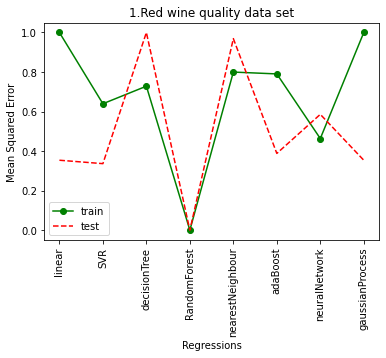

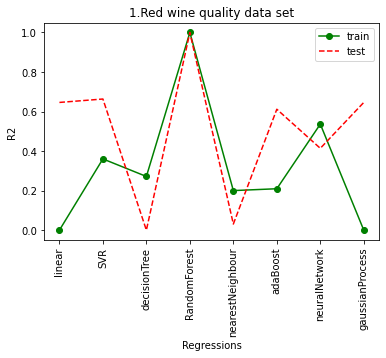

<Figure size 432x288 with 0 Axes>

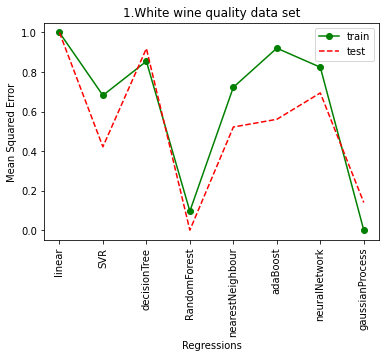

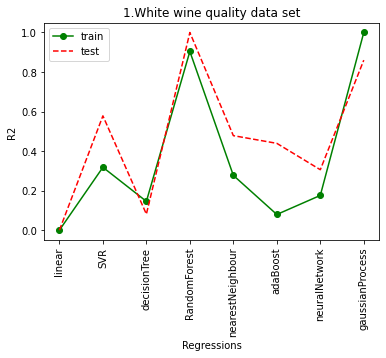

<Figure size 432x288 with 0 Axes>

In [244]:
%%time
# 1 wine
scores1_train , scores1_test= mean_square_score_R2(X1_train, y1_train, X1_test, y1_test,clfList_1, '1.Red wine quality')
plt.figure() 
scores1w_train, scores1w_test = mean_square_score_R2(X1w_train, y1w_train, X1w_test, y1w_test,clfList_1w, '1.White wine quality')

LinearRegression(normalize=True)
SVR(C=1.177703750752171, gamma=0.012221634728708944)
DecisionTreeRegressor(max_depth=5, random_state=0)
RandomForestRegressor(max_depth=24, n_estimators=80, random_state=0)
KNeighborsRegressor(n_neighbors=8)
AdaBoostRegressor(learning_rate=0.6275560134350351, n_estimators=43,
                  random_state=0)
MLPRegressor(learning_rate_init=0.03831957459914712, max_iter=775,
             random_state=0, warm_start=True)
GaussianProcessRegressor(kernel=DotProduct(sigma_0=1), n_restarts_optimizer=8,
                         optimizer=None, random_state=0)
Wall time: 343 ms


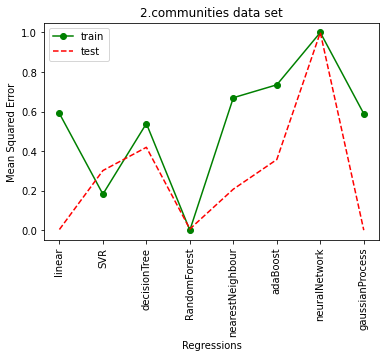

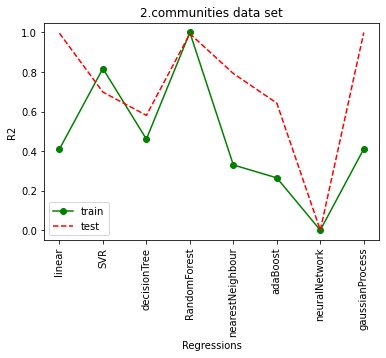

<Figure size 432x288 with 0 Axes>

In [245]:
%%time
#2 plot 
scores2_train , scores2_test = mean_square_score_R2(X2_train, y2_train, X2_test, y2_test,clfList_2, '2.communities')

LinearRegression(normalize=True)
SVR(C=1.0476552591086514, gamma=0.06801737161546001)
DecisionTreeRegressor(max_depth=5, random_state=0)
RandomForestRegressor(max_depth=25, n_estimators=98, random_state=0)
KNeighborsRegressor(n_neighbors=4)
AdaBoostRegressor(learning_rate=1.6569957978658263, loss='square',
                  n_estimators=48, random_state=0)
MLPRegressor(learning_rate_init=0.05215905539817837, max_iter=228,
             random_state=0, warm_start=True)
GaussianProcessRegressor(alpha=1e-08, kernel=DotProduct(sigma_0=1),
                         n_restarts_optimizer=3, optimizer=None,
                         random_state=0)
Wall time: 92.4 ms


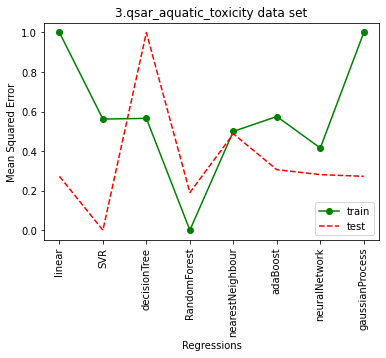

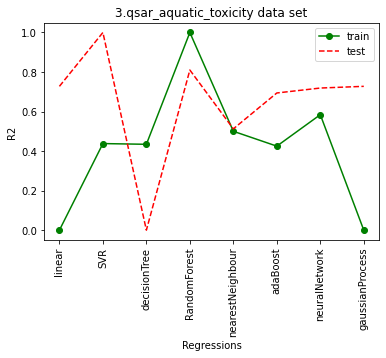

<Figure size 432x288 with 0 Axes>

In [246]:
%%time
#3 plot toxicity
scores3_train , scores3_test = mean_square_score_R2(X3_train, y3_train, X3_test, y3_test,clfList_3, '3.qsar_aquatic_toxicity')

LinearRegression(normalize=True)
SVR(C=4.006483661964395, gamma=0.03506575410186655)
DecisionTreeRegressor(max_depth=5, random_state=0)
RandomForestRegressor(max_depth=2, n_estimators=49, random_state=0)
KNeighborsRegressor(n_neighbors=6)
AdaBoostRegressor(learning_rate=1.6569957978658263, loss='square',
                  n_estimators=48, random_state=0)
MLPRegressor(learning_rate_init=0.043989860558921484, max_iter=651,
             random_state=0, warm_start=True)
GaussianProcessRegressor(alpha=1e-08, kernel=DotProduct(sigma_0=1),
                         n_restarts_optimizer=3, optimizer=None,
                         random_state=0)
Wall time: 87 ms


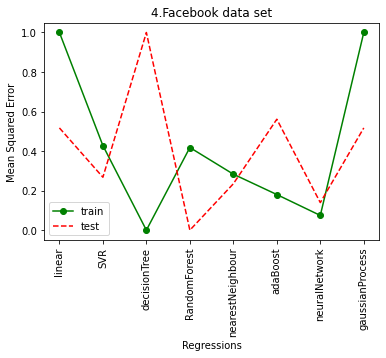

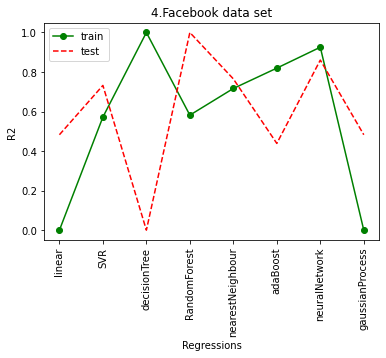

<Figure size 432x288 with 0 Axes>

In [247]:
%%time
#4 plot
scores4_train , scores4_test = mean_square_score_R2(X4_train, y4_train, X4_test, y4_test,clfList_4,'4.Facebook')



LinearRegression(normalize=True)
SVR(C=1.0476552591086514, gamma=0.06801737161546001)
DecisionTreeRegressor(max_depth=17, random_state=0)
RandomForestRegressor(max_depth=25, n_estimators=98, random_state=0)
KNeighborsRegressor(n_neighbors=7)
AdaBoostRegressor(learning_rate=1.0920005241833217, loss='exponential',
                  n_estimators=51, random_state=0)
MLPRegressor(hidden_layer_sizes=(200,), learning_rate_init=0.029548156786236648,
             max_iter=681, random_state=0, warm_start=True)
GaussianProcessRegressor(alpha=1e-08, kernel=DotProduct(sigma_0=1),
                         n_restarts_optimizer=3, optimizer=None,
                         random_state=0)
Wall time: 3.9 s


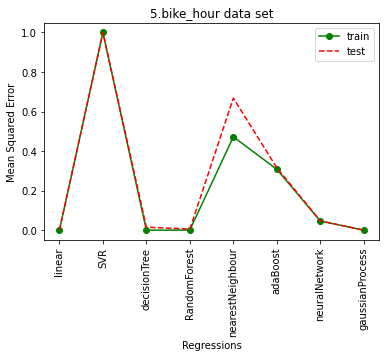

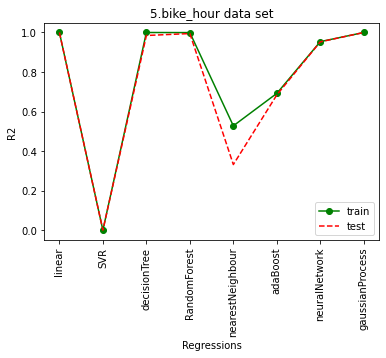

<Figure size 432x288 with 0 Axes>

In [248]:
%%time
#5 plot
scores5_train , scores5_test = mean_square_score_R2(X5_train, y5_train, X5_test, y5_test,clfList_5,'5.bike_hour')

LinearRegression(normalize=True)
SVR(C=1.177703750752171, gamma=0.012221634728708944)
DecisionTreeRegressor(max_depth=5, random_state=0)
RandomForestRegressor(max_depth=4, n_estimators=77, random_state=0)
KNeighborsRegressor(n_neighbors=7)
AdaBoostRegressor(learning_rate=0.9793018985322222, loss='exponential',
                  n_estimators=79, random_state=0)
MLPRegressor(learning_rate_init=0.043989860558921484, max_iter=651,
             random_state=0, warm_start=True)
GaussianProcessRegressor(alpha=1e-08, kernel=DotProduct(sigma_0=1),
                         n_restarts_optimizer=3, optimizer=None,
                         random_state=0)
Wall time: 781 ms


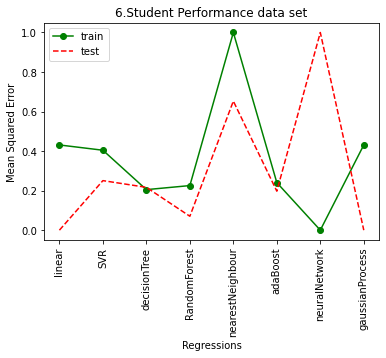

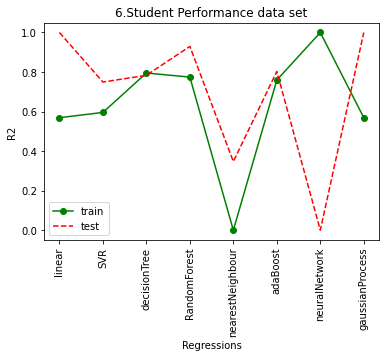

<Figure size 432x288 with 0 Axes>

In [321]:
%%time
#6.Student Performance
scores6_train , scores6_test = mean_square_score_R2(X6_train, y6_train, X6_test, y6_test,clfList_6, '6.Student Performance')

LinearRegression(normalize=True)
SVR(C=6.000075993611754, gamma=0.07413309777968013)
DecisionTreeRegressor(max_depth=17, random_state=0)
RandomForestRegressor(max_depth=25, n_estimators=98, random_state=0)
KNeighborsRegressor(n_neighbors=4)
AdaBoostRegressor(learning_rate=1.6569957978658263, loss='square',
                  n_estimators=48, random_state=0)
MLPRegressor(hidden_layer_sizes=(200,), learning_rate_init=0.029548156786236648,
             max_iter=681, random_state=0, warm_start=True)
GaussianProcessRegressor(alpha=1e-09, kernel=Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=5, optimizer=None,
                         random_state=0)
Wall time: 163 ms


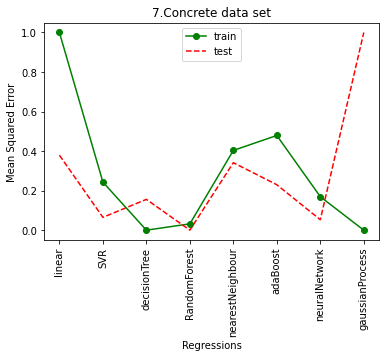

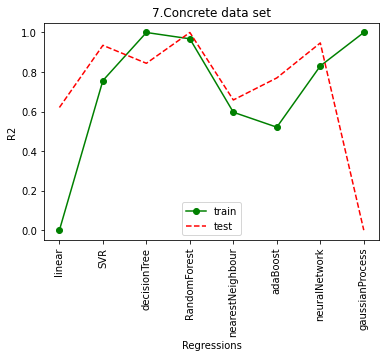

<Figure size 432x288 with 0 Axes>

In [322]:
%%time
#7.concrete
scores7_train , scores7_test = mean_square_score_R2(X7_train, y7_train, X7_test, y7_test,clfList_7,'7.Concrete')

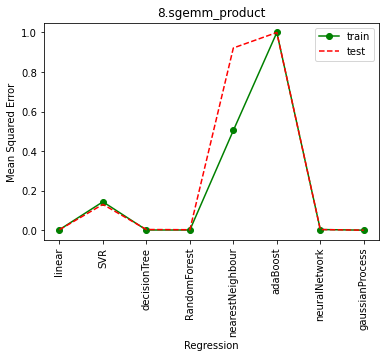

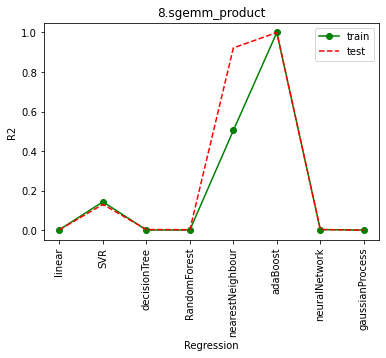

In [324]:
# 8

def plot_mean_square_score(datasetname):
    #clfsList = clfList(X,y)
    score_train= np.array( [3.6623706387160477, 224.73395756163762, 1.3574960091093982, 1.05522109671287, 790.0724481528649, 1566.0579107178178, 5.112305321590217,0
                           ])
    score_test =np.array([3.372836092510094, 204.65259568225326, 5.2961309758726145, 3.537029877205786, 1446.3437616577849, 1569.2107355714, 4.850274105859324,0])
    #print(score_train)
    #print(score_test)   
    xtrain = np.arange(len(score_train))
    xtest = np.arange(len(score_test))

    l_train = len(score_train)
    score_train =(score_train -min(score_train))/(max(score_train)-min(score_train))
    score_test =(score_test -min(score_test))/(max(score_test)-min(score_test))
    
    plt.plot(xtrain, score_train, 'go-', label='train')
    plt.plot(xtest, score_test, '--',color='r', label='test')
    #plt.plot(xtest, score_test, '--', label='varlidation')
  
    
   
    
    #plt.ylim(-minscore, ymax)
    plt.xlabel('Regression')
    plt.ylabel('Mean Squared Error')
    plt.xticks(xtrain, labels= clfNames, rotation='vertical')
    plt.title('%s' %datasetname);
    plt.legend();
    plt.figure();
    return score_train, score_test
    
def plot_R2(datasetname):
    #clfsList = clfList(X,y)
    score_train= np.array( [3.6623706387160477, 224.73395756163762, 1.3574960091093982, 1.05522109671287, 790.0724481528649, 1566.0579107178178, 5.112305321590217,3.2650360901567173e-07])
    score_test =np.array([3.372836092510094, 204.65259568225326, 5.2961309758726145, 3.537029877205786, 1446.3437616577849, 1569.2107355714, 4.850274105859324,2.8866998220340193e-07])
    #print(score_train)
    #print(score_test)   
    xtrain = np.arange(len(score_train))
    xtest = np.arange(len(score_test))

    l_train = len(score_train)
    score_train =(score_train -min(score_train))/(max(score_train)-min(score_train))
    score_test =(score_test -min(score_test))/(max(score_test)-min(score_test))
   # print(score_train)
   # print(score_test)   
    plt.plot(xtrain, score_train, 'go-', label='train')
    plt.plot(xtest, score_test, '--',color='r', label='test')
    #plt.plot(xtest, score_test, '--', label='varlidation')
    
    #plt.ylim(-minscore, ymax)
    plt.xlabel('Regression')
    plt.ylabel('R2')
    plt.xticks(xtrain, labels= clfNames, rotation='vertical')
    plt.title('%s' %datasetname);
    plt.legend();
    
scores8_train, scores8_test =plot_mean_square_score('8.sgemm_product')

plot_R2('8.sgemm_product')

4. best Regression model:

In [325]:
scores_train=np.array([scores1w_train[0],scores2_train[0],scores3_train[0],scores4_train[0],scores5_train[0],scores6_train[0],scores7_train[0],scores8_train])
scores_test=np.array([scores1w_test[0],scores2_test[0],scores3_test[0],scores4_test[0],scores5_test[0],scores6_test[0],scores7_test[0],scores8_test])


allScoresMean_train = np.mean(scores_train, axis=0)
allScoresMean_test = np.mean(scores_train, axis=0)

In [326]:
print(allScoresMean_train)
for index in np.argsort(allScoresMean_train):
    print(clfNames[index])

[0.0111131  0.02416789 0.00608839 0.00292529 0.07111696 0.1330482
 0.00763615 0.00674213]
RandomForest
decisionTree
gaussianProcess
neuralNetwork
linear
SVR
nearestNeighbour
adaBoost


In [327]:
print(allScoresMean_test)
for index in np.argsort(allScoresMean_test):
    print(clfNames[index])

[0.0111131  0.02416789 0.00608839 0.00292529 0.07111696 0.1330482
 0.00763615 0.00674213]
RandomForest
decisionTree
gaussianProcess
neuralNetwork
linear
SVR
nearestNeighbour
adaBoost
